In [1]:
# 0/1 Knapsack - bottom-up DP with item reconstruction
projects = ["P1","P2","P3","P4","P5","P6"]
costs    = [10,  20,  30,  25,  15,  12]   # in lakhs
profits  = [15,  25,  40,  30,  18,  20]   # in lakhs
capacity = 50

n = len(projects)
# DP table K[i][c] = max profit using first i items with capacity c
K = [[0] * (capacity + 1) for _ in range(n + 1)]

for i in range(1, n+1):
    w = costs[i-1]
    v = profits[i-1]
    for c in range(capacity + 1):
        if w <= c:
            K[i][c] = max(K[i-1][c], K[i-1][c-w] + v)
        else:
            K[i][c] = K[i-1][c]

max_profit = K[n][capacity]

# backtrack to find selected projects
c = capacity
selected = []
for i in range(n, 0, -1):
    if K[i][c] != K[i-1][c]:
        selected.append(projects[i-1])
        c -= costs[i-1]
selected.reverse()

print("Maximum profit:", max_profit)
print("Selected projects:", selected)


Maximum profit: 65
Selected projects: ['P2', 'P3']


In [2]:
# Greedy Job Sequencing for ads
ads = [
    ("A1", 2, 60),
    ("A2", 1, 100),
    ("A3", 3, 20),
    ("A4", 2, 40),
    ("A5", 1, 20),
    ("A6", 3, 70),
    ("A7", 2, 50)
]

# sort by revenue descending
ads_sorted = sorted(ads, key=lambda x: x[2], reverse=True)

max_deadline = max(a[1] for a in ads_sorted)
slots = [None] * (max_deadline + 1)  # 1-based index
total_revenue = 0

for job_id, deadline, revenue in ads_sorted:
    # place job in the latest free slot <= deadline
    for slot in range(deadline, 0, -1):
        if slots[slot] is None:
            slots[slot] = (job_id, revenue)
            total_revenue += revenue
            break

scheduled = [slots[i] for i in range(1, len(slots))]
print("Scheduled slots (1..max_deadline):", scheduled)
print("Total revenue:", total_revenue)


Scheduled slots (1..max_deadline): [('A2', 100), ('A1', 60), ('A6', 70)]
Total revenue: 230


In [3]:

# Sudoku Solver (Backtracking)

N = 9

# check if it's safe to place num in cell (row,col)
def is_safe(board, row, col, num):
    for x in range(N):
        if board[row][x] == num or board[x][col] == num:
            return False

    start_row, start_col = row - row % 3, col - col % 3
    for i in range(3):
        for j in range(3):
            if board[start_row + i][start_col + j] == num:
                return False
    return True


def solve_sudoku(board, row=0, col=0):
    if row == N - 1 and col == N:
        return True
    if col == N:
        row += 1
        col = 0
    if board[row][col] != 0:
        return solve_sudoku(board, row, col + 1)

    for num in range(1, 10):
        if is_safe(board, row, col, num):
            board[row][col] = num
            if solve_sudoku(board, row, col + 1):
                return True
            board[row][col] = 0
    return False


def print_board(board):
    for r in board:
        print(r)

# Example Sudoku (0 = blank)
board = [
    [3, 0, 6, 5, 0, 8, 4, 0, 0],
    [5, 2, 0, 0, 0, 0, 0, 0, 0],
    [0, 8, 7, 0, 0, 0, 0, 3, 1],
    [0, 0, 3, 0, 1, 0, 0, 8, 0],
    [9, 0, 0, 8, 6, 3, 0, 0, 5],
    [0, 5, 0, 0, 9, 0, 6, 0, 0],
    [1, 3, 0, 0, 0, 0, 2, 5, 0],
    [0, 0, 0, 0, 0, 0, 0, 7, 4],
    [0, 0, 5, 2, 0, 6, 3, 0, 0]
]

print(" Original Sudoku:")
print_board(board)

if solve_sudoku(board):
    print("\n Solved Sudoku:")
    print_board(board)
else:
    print(" No solution exists")


 Original Sudoku:
[3, 0, 6, 5, 0, 8, 4, 0, 0]
[5, 2, 0, 0, 0, 0, 0, 0, 0]
[0, 8, 7, 0, 0, 0, 0, 3, 1]
[0, 0, 3, 0, 1, 0, 0, 8, 0]
[9, 0, 0, 8, 6, 3, 0, 0, 5]
[0, 5, 0, 0, 9, 0, 6, 0, 0]
[1, 3, 0, 0, 0, 0, 2, 5, 0]
[0, 0, 0, 0, 0, 0, 0, 7, 4]
[0, 0, 5, 2, 0, 6, 3, 0, 0]

 Solved Sudoku:
[3, 1, 6, 5, 7, 8, 4, 9, 2]
[5, 2, 9, 1, 3, 4, 7, 6, 8]
[4, 8, 7, 6, 2, 9, 5, 3, 1]
[2, 6, 3, 4, 1, 5, 9, 8, 7]
[9, 7, 4, 8, 6, 3, 1, 2, 5]
[8, 5, 1, 7, 9, 2, 6, 4, 3]
[1, 3, 8, 9, 4, 7, 2, 5, 6]
[6, 9, 2, 3, 5, 1, 8, 7, 4]
[7, 4, 5, 2, 8, 6, 3, 1, 9]


In [4]:

#  Brute-force Password Cracker

import itertools
import string
import time

# simulated target password
password = "cat"

def brute_force_crack(target):
    chars = string.ascii_lowercase  # try lowercase letters only
    start = time.time()
    attempts = 0
    for length in range(1, 6):  # try lengths 1–5
        for combo in itertools.product(chars, repeat=length):
            attempts += 1
            guess = ''.join(combo)
            if guess == target:
                end = time.time()
                print(f" Password found: {guess}")
                print(f"Attempts: {attempts}")
                print(f"Time taken: {round(end-start, 3)} seconds")
                return
    print(" Password not found")

brute_force_crack(password)


 Password found: cat
Attempts: 2074
Time taken: 0.0 seconds


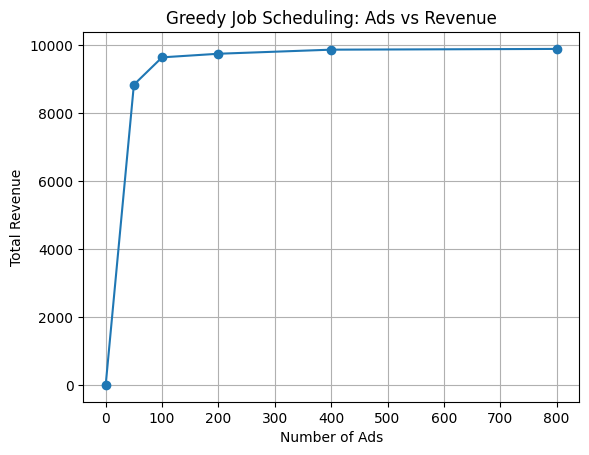

In [8]:
import matplotlib.pyplot as plt
import random
import time

# Input size variations
num_ads = [0,50, 100, 200, 400, 800]
revenues = []

for n in num_ads:
    ads = [(i, random.randint(1, 10), random.randint(100, 1000)) for i in range(n)]
    profit = greedy_job_scheduling(ads, 10)
    revenues.append(profit)

# Plot
plt.plot(num_ads, revenues, marker='o')
plt.title('Greedy Job Scheduling: Ads vs Revenue')
plt.xlabel('Number of Ads')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

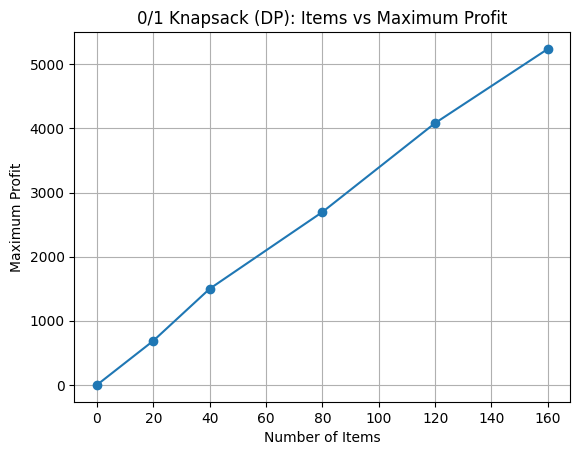

In [7]:
import matplotlib.pyplot as plt
import random
import time

# Inputs
num_items = [0,20, 40, 80, 120, 160]
profits = []

for n in num_items:
    weights = [random.randint(1, 15) for _ in range(n)]
    values = [random.randint(10, 100) for _ in range(n)]
    capacity = int(sum(weights) * 0.3)
    profit = knapsack(weights, values, capacity)
    profits.append(profit)

# Plot
plt.plot(num_items, profits, marker='o')
plt.title('0/1 Knapsack (DP): Items vs Maximum Profit')
plt.xlabel('Number of Items')
plt.ylabel('Maximum Profit')
plt.grid(True)
plt.show()


In [13]:

empty_cells = [10, 20, 30, 40, 50]
times = []

for empties in empty_cells:
    # Create a copy of the solved board and add empty cells artificially
    temp_board = [[board[i][j] for j in range(9)] for i in range(9)]
    count = 0
    for i in range(9):
        for j in range(9):
            if count < empties:
                temp_board[i][j] = 0
                count += 1
    t1 = time.time()
    solve_sudoku(temp_board)
    t2 = time.time()
    times.append(t2 - t1)


plt.plot(empty_cells, times, marker='o')
plt.title("Sudoku Backtracking: Empty Cells vs Solving Time")
plt.xlabel("Number of Empty Cells")
plt.ylabel("Solving Time (seconds)")
plt.grid(True)
plt.show()


NameError: name 'board' is not defined